# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [2]:
import numpy as np

def linan(a11, a12, b1, a21, a22, b2):
  first_part = np.array([[a11, a12], [a21, a22]], dtype=float)
  second_part = np.array([b1, b2], dtype=float)
  return np.linalg.solve(first_part, second_part)

a11, a12, b1 = input("Please insert coefficients for first equation in form: a11 a12 b1: ").split(' ')
a21, a22, b2 = input("Please insert coefficients for second equation in form: a21 a22 b2: ").split(' ')
solved = linan(a11, a12, b1, a21, a22, b2)
print('x:', solved[0], ' y:', solved[1])

Please insert coefficients for first equation in form: a11 a12 b1: 2 3 5
Please insert coefficients for second equation in form: a21 a22 b2: 1 3 5
x: -1.1102230246251565e-16  y: 1.6666666666666667


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```

In [3]:
import numpy as np
def decorate_matrix(n):
  matrix = np.ones((n,n),dtype=int)
  matrix[1:-1, 1:-1] = 0
  return matrix

n = int(input("Please specify n: "))
solved = decorate_matrix(n)
print(solved)


Please specify n: 5
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [4]:
import scipy.optimize as sp
import numpy as np

a = float(input("Specify a: "))
b = float(input("Specify b: "))
def f(x):
  return ((x + a) * (x + a)) - b
def g(x):
  return np.abs(f(x))

min_f = sp.minimize(f, 0, method='Nelder-Mead').x
min_g1 = sp.minimize(g, 0, method='Nelder-Mead').x
min_g2 = sp.minimize(g, -10, method='Nelder-Mead').x
print('f minimums:', min_f, ' g minimums:', min_g1, ',', min_g2)

Specify a: 3
Specify b: 4
f minimums: [-3.]  g minimums: [-1.] , [-5.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

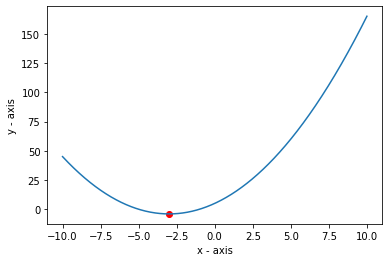

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(x, f(x))
plt.scatter(min_f, f(min_f), c='red')

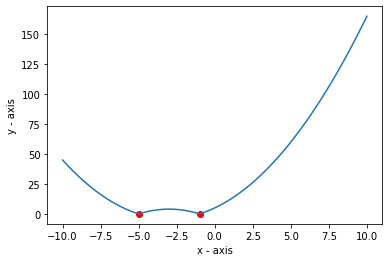

In [6]:
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(x, g(x))
g_mins = np.array([min_g1, min_g2])
plt.scatter(g_mins, g(g_mins), c='red')

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [7]:
import numpy as np

ans1 = []
ans2 = []
ans3 = []
distirbution = np.random.binomial(1, 0.5, (1000, 1000, 10))
for res in distirbution:
  tmp = []
  for i in range(len(res)):
    if np.all(res[i] == res[i][0]):
      tmp.append(1)
    else:
      tmp.append(0)
  if sum(tmp) > 0:
    ans1.append(1)
  else:
    ans1.append(0)
for res in distirbution:
  tmp = 0
  for row in res:
    for i in range(3):
      s = sum(row[i: i + 8])
      if (s == 8 or s == 0):
        tmp = 1
        break
  ans2.append(tmp)
for res in distirbution:
  tmp = []
  for i in range(len(res)):
    if np.all(res[i] == res[i][0]):
      tmp.append(1)
    else:
      tmp.append(0)
  if sum(tmp) == 3:
    ans3.append(1)
  else:
    ans3.append(0)
ans1 = sum(ans1)/1000
ans2 = sum(ans2)/1000
ans3 = sum(ans3)/1000
print(ans1,ans2,ans3)


0.835 1.0 0.17
